### Data Preprocessing (src/data_preprocessing.ipynb)
Implented works:
- Data collection from different source
    - CNN, Daily Mail : News, 
    - BillSum: Legal, 
    - ArXiv : Scientific
    - Dialoguesum : Conversations.
    
- Validating the data through Data Stats and EDA (Histogram)
    - (for each data)
    - saved the each data in separate files (preprocessed - 1, 2, 3, 4)

- Data integration of selective data from each sources.
    - selected from splits (train, test, val).
    - Factors considered:
        - Number of records
        - Quality of data
        - Representation of different data groups (Multi-Objective)
        - To enable the model training in domestic GPU.
            - Limits the number of records.
    - selected data:
        - CNN, Daily Mail - test, validation
        - BillSum - train
        - ArXiv - test
        - Dialoguesum - train
    - renamed the attributes to general form (text, summary).
    - Validated the data using statistics and frequency plot.

- Data cleansing optimized for NLP tasks.
    - Lowercasing
    - Removed punctuation
    - Removed stopwords 
    - Lemmatization

- Data splitting - train, test, validation
    - saved the data in csv format.
    - https://drive.google.com/drive/folders/1yH89iZmARdc-R7QY6pwfE8tbOJI_n9K8?usp=sharing -> dataset 

In [7]:
!pip install scikit-learn nltk pandas datasets -q

/bin/bash: /home/mohan/miniconda3/envs/env/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
import nltk
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
# Function to count the number of words in a string
def count_words(text):
    if isinstance(text, str):  # Ensure text is a string
        tokens = nltk.word_tokenize(text)
        return len(tokens)
    else:
        return 0  # Return 0 if text is not a valid string


[nltk_data] Downloading package punkt to /home/mohan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import os
import pandas as pd
from datasets import load_dataset

def preprocess_data(data_link, output_dir, splits, attr):
    # Load dataset
    dataset = data_link

    # Save the dataset as CSV
    for split in splits:
        df = pd.DataFrame(dataset[split])

        #Null values
        print(f'\n\t{split}\nNull Values:')
        print(df.isnull().sum())
        
        #Stats
        print('\nStatistics:\n')
        print(df[attr[0]].apply(len).describe() , '\n')
        print(df[attr[1]].apply(len).describe())                

        #Histogram
        plt.hist(df[attr[0]].apply(len), bins=100)
        plt.xlabel("Text length")
        plt.ylabel("Frequency")
        plt.title("Text")
        plt.show()

        plt.hist(df[attr[0]].apply(len), bins=100)
        plt.xlabel("Summary length")
        plt.ylabel("Frequency")
        plt.title("Summary")
        plt.show()

        df.to_csv(os.path.join(output_dir, f'{split}.csv'), index=False)


	train
Null Values:
article       0
highlights    0
id            0
dtype: int64

Statistics:

count    287113.000000
mean       4033.661722
std        1954.339537
min          48.000000
25%        2583.000000
50%        3682.000000
75%        5117.000000
max       15925.000000
Name: article, dtype: float64 

count    287113.000000
mean        294.770390
std         120.197405
min          14.000000
25%         218.000000
50%         280.000000
75%         342.000000
max        7388.000000
Name: highlights, dtype: float64


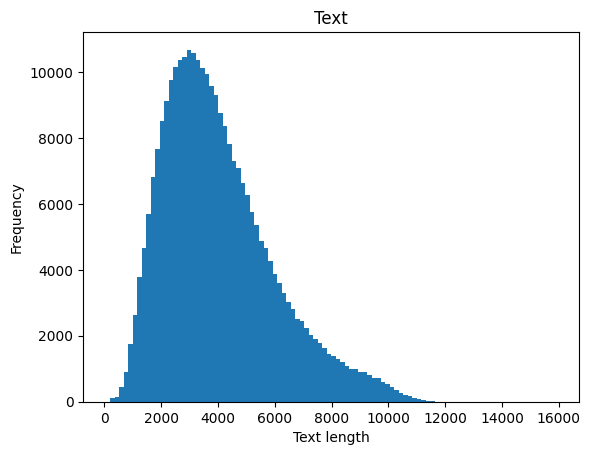

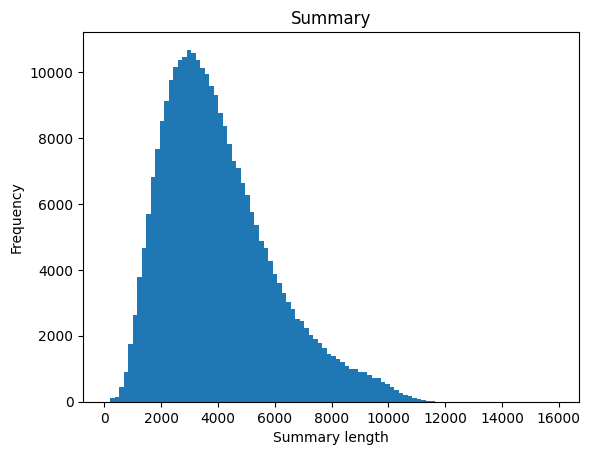


	validation
Null Values:
article       0
highlights    0
id            0
dtype: int64

Statistics:

count    13368.000000
mean      3923.831912
std       1992.463205
min        245.000000
25%       2404.000000
50%       3523.000000
75%       5041.000000
max      11412.000000
Name: article, dtype: float64 

count    13368.000000
mean       328.033513
std        146.304859
min         52.000000
25%        229.000000
50%        299.000000
75%        386.000000
max       8541.000000
Name: highlights, dtype: float64


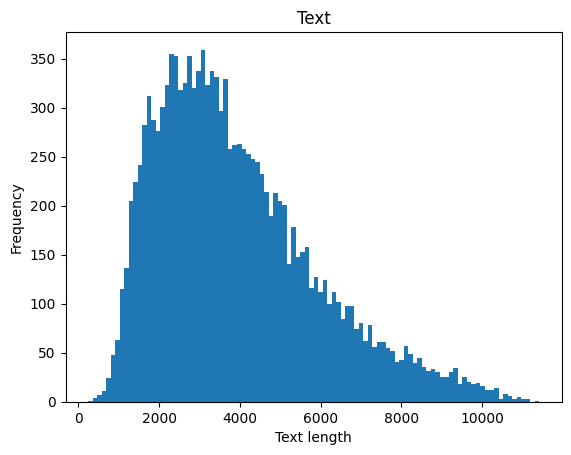

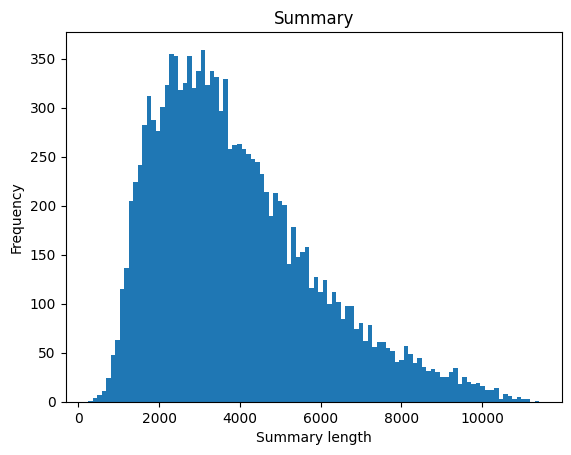


	test
Null Values:
article       0
highlights    0
id            0
dtype: int64

Statistics:

count    11490.000000
mean      3967.077807
std       2024.843965
min        293.000000
25%       2432.000000
50%       3563.000000
75%       5076.750000
max      11991.000000
Name: article, dtype: float64 

count    11490.000000
mean       311.927241
std        128.027548
min         51.000000
25%        223.000000
50%        290.000000
75%        359.000000
max       3410.000000
Name: highlights, dtype: float64


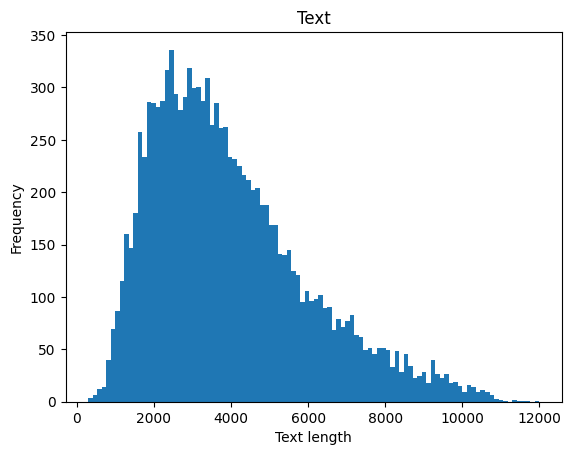

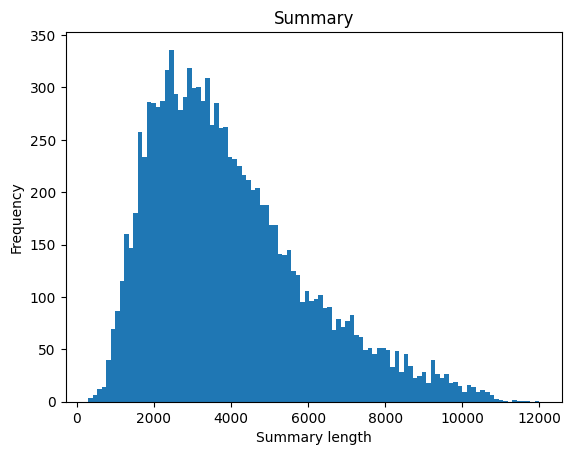

In [10]:
#CNN, Daily Mail
dat = load_dataset('cnn_dailymail', '3.0.0')
output_dir = '/home/mohan/infy/data/processed_1'
splits = ['train', 'validation', 'test']
attr = ['article', 'highlights']

os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)


	train
Null Values:
text       0
summary    0
title      0
dtype: int64

Statistics:

count    18949.000000
mean     10272.542931
std       4120.574696
min       5001.000000
25%       6733.000000
50%       9283.000000
75%      13204.000000
max      19998.000000
Name: text, dtype: float64 

count    18949.000000
mean      1185.639981
std        761.114616
min         52.000000
25%        613.000000
50%       1042.000000
75%       1585.000000
max       4995.000000
Name: summary, dtype: float64


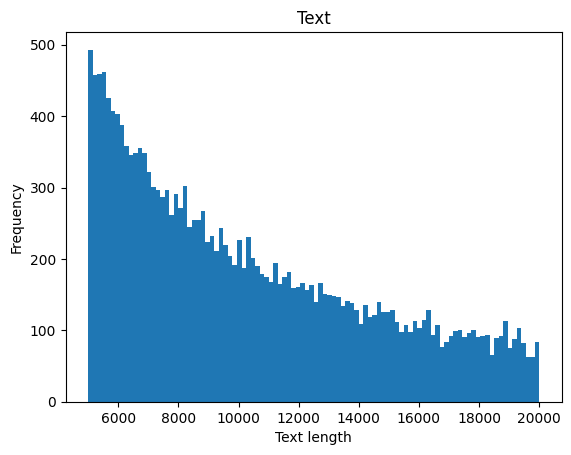

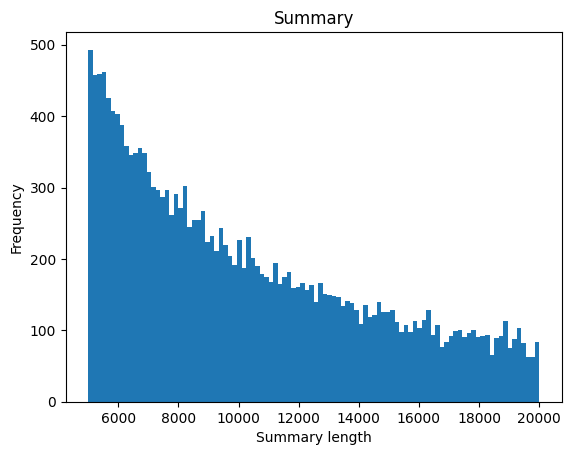


	test
Null Values:
text       0
summary    0
title      0
dtype: int64

Statistics:

count     3269.000000
mean     10268.095442
std       4150.628928
min       5004.000000
25%       6641.000000
50%       9316.000000
75%      13076.000000
max      19998.000000
Name: text, dtype: float64 

count    3269.000000
mean     1184.728357
std       760.250615
min        62.000000
25%       615.000000
50%      1033.000000
75%      1578.000000
max      4986.000000
Name: summary, dtype: float64


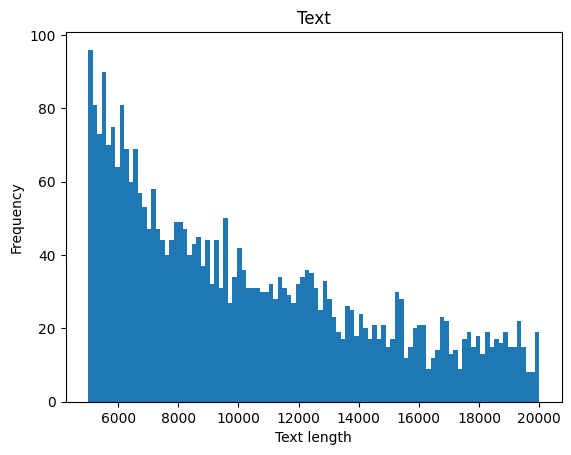

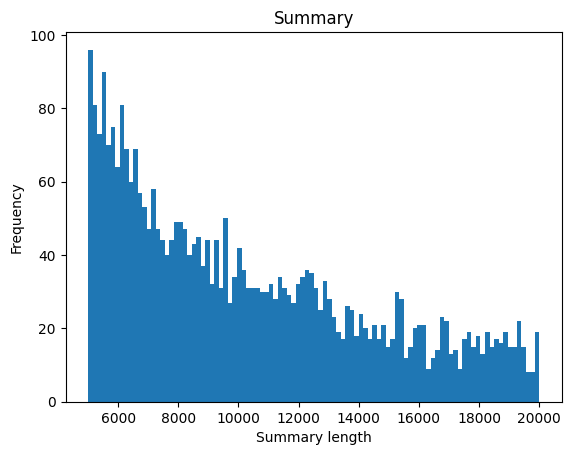

In [11]:
#BillSum - Legal
dat = load_dataset('FiscalNote/billsum')
output_dir = '/home/mohan/infy/data/processed_2'
splits = ['train', 'test']
attr = ['text', 'summary']
os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)

/home/mohan/miniconda3/envs/infosys/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for ccdv/arxiv-summarization contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/arxiv-summarization
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(



	train
Null Values:
article     0
abstract    0
dtype: int64

Statistics:

count    203037.000000
mean      33841.539380
std       25744.027115
min           0.000000
25%       17818.000000
50%       27689.000000
75%       43119.000000
max      745192.000000
Name: article, dtype: float64 

count    203037.000000
mean       1619.359668
std        3304.255335
min           0.000000
25%         685.000000
50%         978.000000
75%        1396.000000
max      153425.000000
Name: abstract, dtype: float64


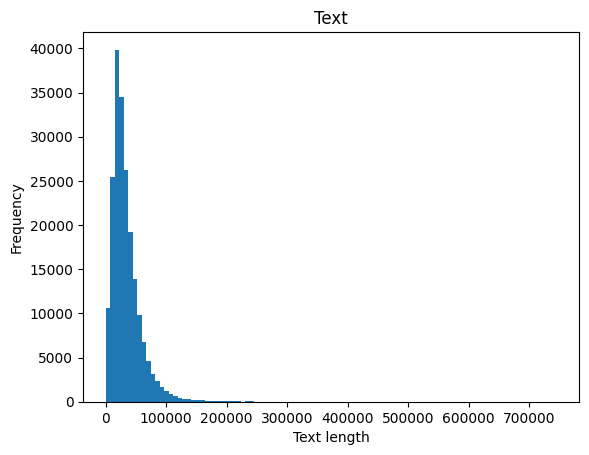

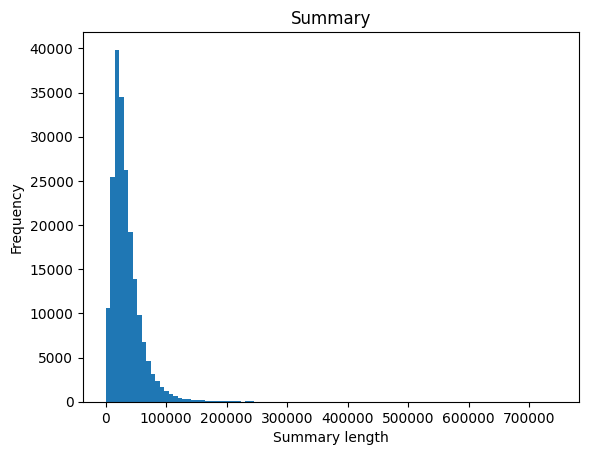


	validation
Null Values:
article     0
abstract    0
dtype: int64

Statistics:

count      6436.000000
mean      33028.408328
std       21562.143342
min        1108.000000
25%       18848.750000
50%       28124.500000
75%       41750.250000
max      240628.000000
Name: article, dtype: float64 

count    6436.000000
mean      958.801896
std       341.219978
min       246.000000
25%       695.000000
50%       936.000000
75%      1210.250000
max      1912.000000
Name: abstract, dtype: float64


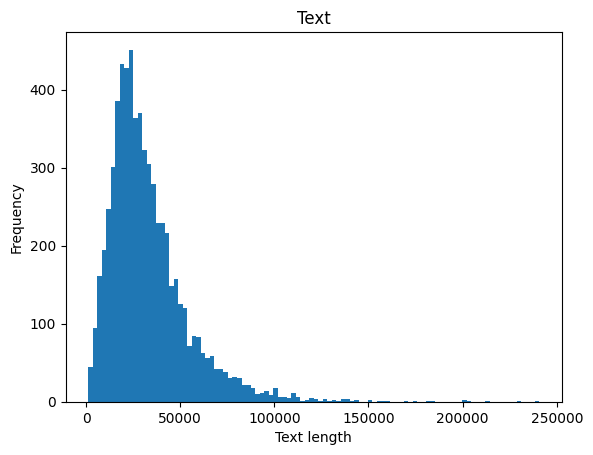

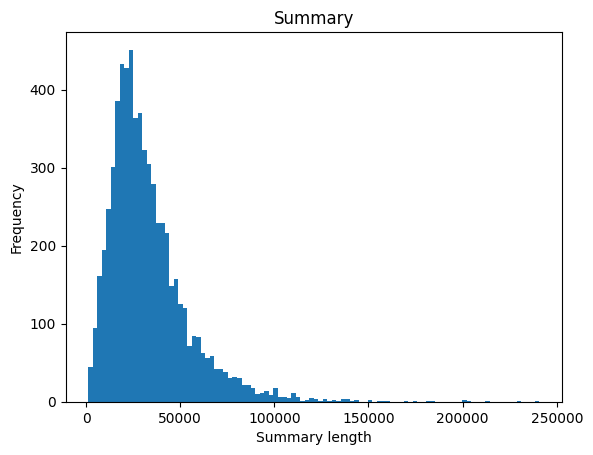


	test
Null Values:
article     0
abstract    0
dtype: int64

Statistics:

count      6440.000000
mean      33062.248292
std       21874.180366
min         701.000000
25%       19022.500000
50%       28127.500000
75%       41829.750000
max      489287.000000
Name: article, dtype: float64 

count    6440.000000
mean      966.451708
std       335.362051
min       237.000000
25%       708.000000
50%       946.500000
75%      1221.000000
max      1875.000000
Name: abstract, dtype: float64


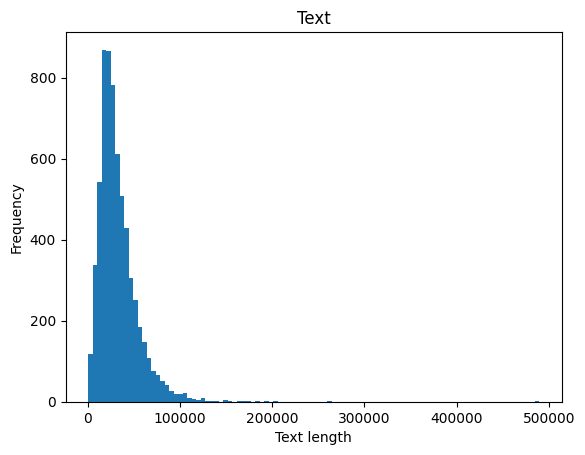

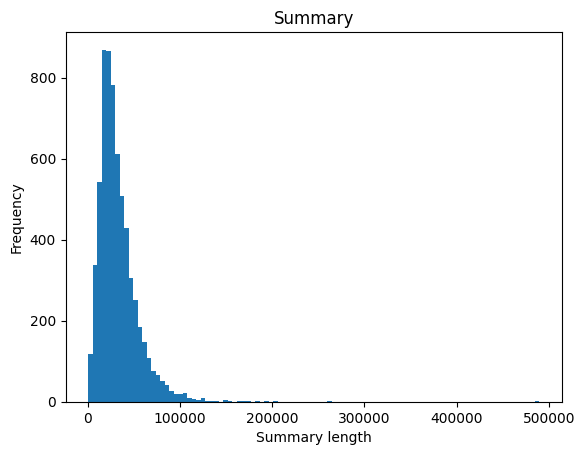

In [12]:
#ArXiv - Scientific
dat = load_dataset("ccdv/arxiv-summarization")
output_dir = '/home/mohan/infy/data/processed_3'
splits = ['train', 'validation', 'test'] 
attr = ['article', 'abstract', 'id']
os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)



	train
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count    12460.000000
mean       738.281300
std        396.544752
min        190.000000
25%        485.000000
50%        653.000000
75%        916.000000
max       5178.000000
Name: dialogue, dtype: float64 

count    12460.000000
mean       140.733547
std         65.133972
min         31.000000
25%         95.000000
50%        129.000000
75%        173.000000
max       1039.000000
Name: summary, dtype: float64


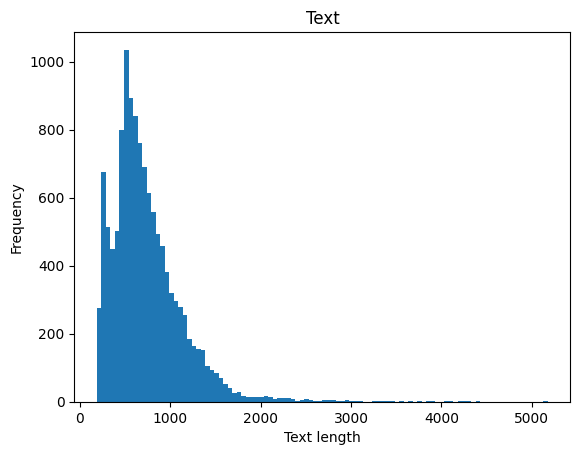

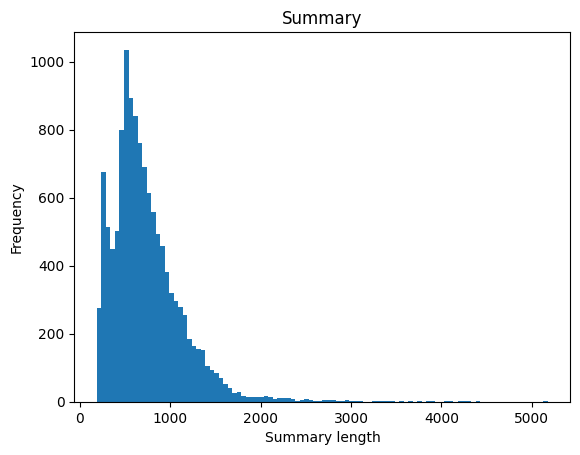


	validation
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count     500.000000
mean      727.386000
std       366.971931
min       211.000000
25%       477.000000
50%       642.500000
75%       912.500000
max      2563.000000
Name: dialogue, dtype: float64 

count    500.000000
mean     129.952000
std       59.074438
min       33.000000
25%       86.750000
50%      117.000000
75%      158.500000
max      398.000000
Name: summary, dtype: float64


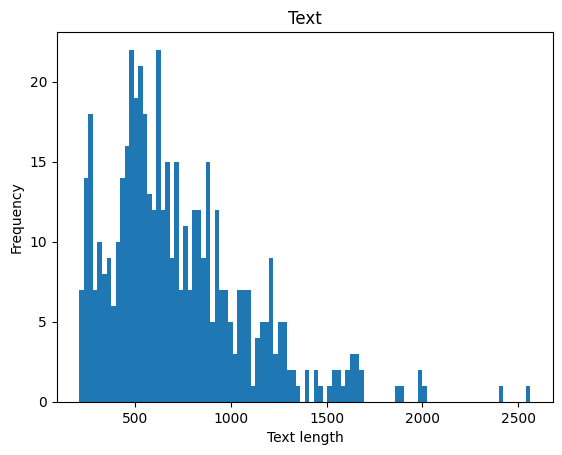

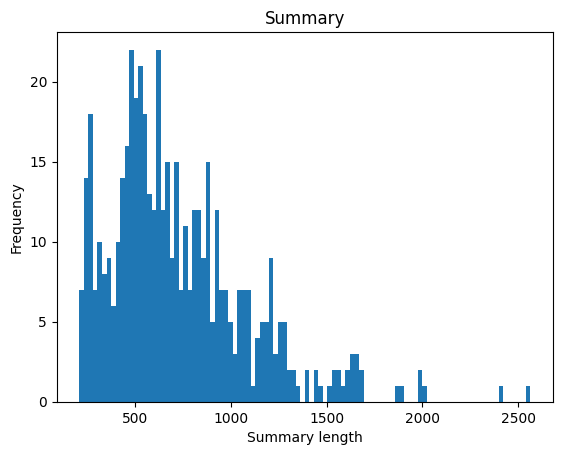


	test
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count    1500.000000
mean      757.324000
std       424.975239
min       209.000000
25%       472.750000
50%       668.000000
75%       956.000000
max      4430.000000
Name: dialogue, dtype: float64 

count    1500.000000
mean      114.521333
std        50.470239
min        27.000000
25%        79.000000
50%       105.000000
75%       140.000000
max       467.000000
Name: summary, dtype: float64


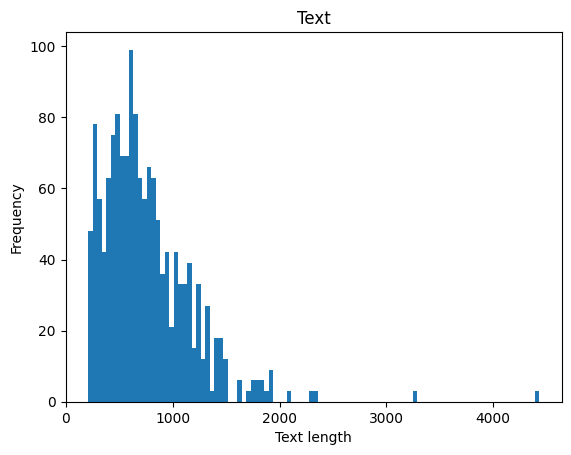

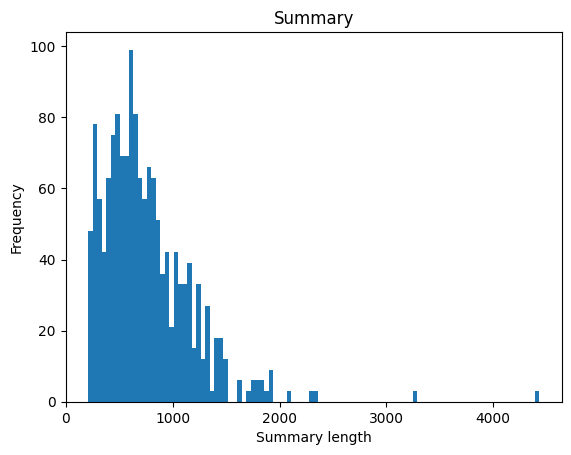

In [13]:
dat = load_dataset("knkarthick/dialogsum")
output_dir = '/home/mohan/infy/data/processed_4'
splits = ['train', 'validation', 'test'] 
attr = ['dialogue', 'summary']
os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)

In [4]:
# Load
train_df = pd.read_csv('/home/mohan/infy/data/processed_2/train.csv') #billsum
validation_df = pd.read_csv('/home/mohan/infy/data/processed_1/validation.csv') #cnn
cnn_df_2 = pd.read_csv('/home/mohan/infy/data/processed_1/test.csv')  # cnn
test_df = pd.read_csv('/home/mohan/infy/data/processed_3/test.csv') #arxiv
dialogue_df = pd.read_csv('/home/mohan/infy/data/processed_4/train.csv') #dialogue summary

# Rename 
train_df.rename(columns={'text': 'text', 'summary': 'summary'}, inplace=True)
train_df.drop('title', axis=1, inplace=True)
validation_df.rename(columns={'article': 'text', 'highlights': 'summary'}, inplace=True)
validation_df.drop('id', axis=1, inplace=True)
cnn_df_2.rename(columns={'article': 'text', 'highlights': 'summary'}, inplace=True)
cnn_df_2.drop('id', axis=1, inplace=True)
test_df.rename(columns={'article': 'text', 'abstract': 'summary'}, inplace=True)
dialogue_df.rename(columns={'dialogue': 'text'}, inplace=True)
dialogue_df.drop(['topic', 'id'], axis=1, inplace=True)

# Concatenate 
merged_df = pd.concat([train_df, validation_df, cnn_df_2 ,test_df, dialogue_df], ignore_index=True)


print(merged_df['text'].apply(len).describe(), '\n')
print(merged_df['summary'].apply(len).describe())

count     62707.000000
mean       8209.765879
std       11786.346696
min         190.000000
25%        1892.000000
50%        5051.000000
75%        9439.500000
max      489287.000000
Name: text, dtype: float64 

count    62707.000000
mean       612.585150
std        620.618153
min         31.000000
25%        213.000000
50%        353.000000
75%        839.000000
max       8541.000000
Name: summary, dtype: float64


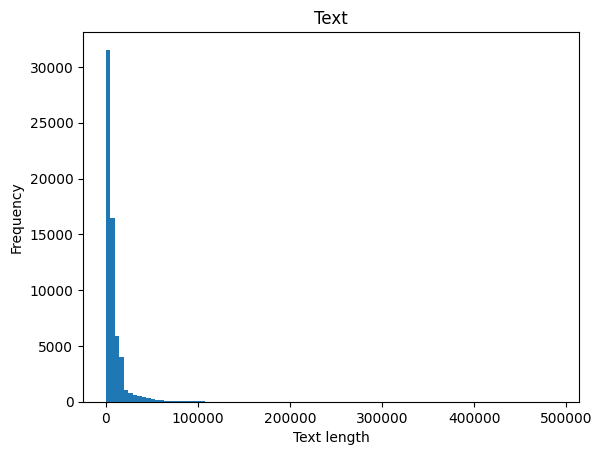

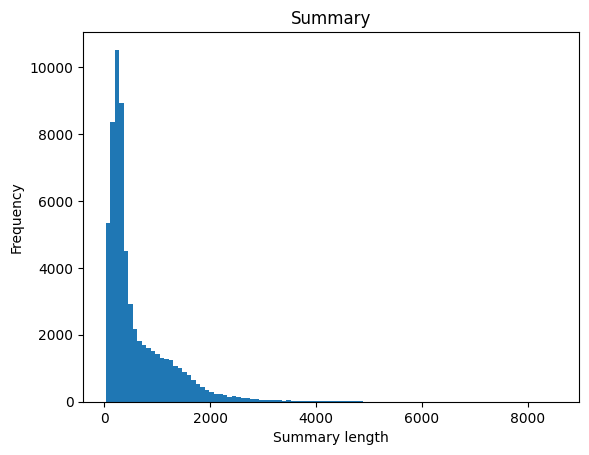

In [15]:
#Histogram
plt.hist(merged_df['text'].apply(len), bins=100)
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Text")
plt.show()

plt.hist(merged_df['summary'].apply(len), bins=100)
plt.xlabel("Summary length")
plt.ylabel("Frequency")
plt.title("Summary")
plt.show()

In [2]:
import os
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    text = ' '.join(tokens)
    
    return text

# Apply cleaning function to both text and summary columns
merged_df['text'] = merged_df['text'].apply(clean_text)
merged_df['summary'] = merged_df['summary'].apply(clean_text)

merged_df.to_csv('/home/mohan/infy/data/merged/data.csv', index=False)



[nltk_data] Downloading package punkt to /home/mohan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mohan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"\n# Apply cleaning function to both text and summary columns\nmerged_df['text'] = merged_df['text'].apply(clean_text)\nmerged_df['summary'] = merged_df['summary'].apply(clean_text)\n\nmerged_df.to_csv('/home/mohan/infy/data/merged/data.csv', index=False)\n\n"

                                                text  \
0  section 1 liability business entity providing ...   
1  section 1 short title act may cited human righ...   
2  section 1 short title act may cited jackie rob...   
3  section 1 nonrecognition gain rollover small b...   
4  section 1 short title act may cited native ame...   

                                             summary  
0  shield business entity civil liability relatin...  
1  human right information act requires certain f...  
2  jackie robinson commemorative coin act directs...  
3  amends internal revenue code provide temporari...  
4  native american energy act sec 3 amends energy...   

count     62707.000000
mean       5211.270975
std        7794.860686
min          83.000000
25%        1275.000000
50%        3176.000000
75%        5684.500000
max      323742.000000
Name: text, dtype: float64 

count    62707.000000
mean       448.081937
std        459.087443
min         16.000000
25%        154.000000
50%     

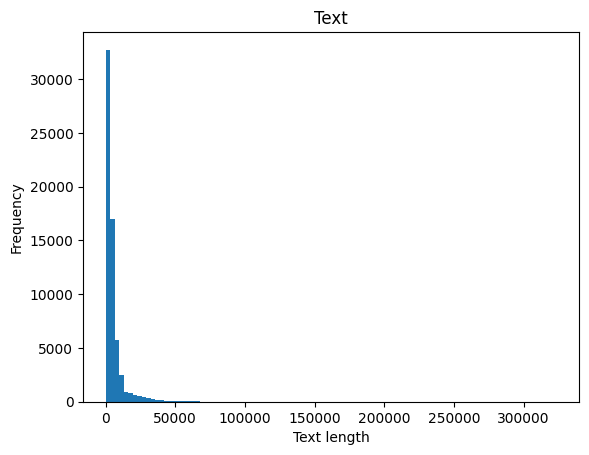

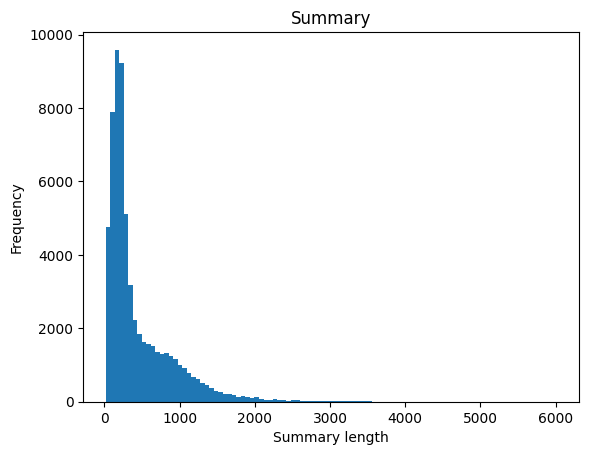

In [22]:
print(merged_df.head() , '\n')

print(merged_df['text'].apply(len).describe(), '\n')
print(merged_df['summary'].apply(len).describe())

#Histogram
plt.hist(merged_df['text'].apply(len), bins=100)
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Text")
plt.show()

plt.hist(merged_df['summary'].apply(len), bins=100)
plt.xlabel("Summary length")
plt.ylabel("Frequency")
plt.title("Summary")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

output_dir = '/home/mohan/infy/data/fined/split'

df = pd.read_csv('/home/mohan/infy/data/fined/mer.csv')
    
# Split the dataset into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
# Save 
train_df.to_csv(f"{output_dir}/train.csv", index=False)
val_df.to_csv(f"{output_dir}/validation.csv", index=False)
test_df.to_csv(f"{output_dir}/test.csv", index=False)
